In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [156]:
conn = sqlite3.connect("bluebikes.db")

In [157]:
stations = pd.read_sql_query("SELECT * FROM stations", conn)
rides = pd.read_sql_query("SELECT * FROM rides", conn)


In [158]:
stations.head()

,id,station_name
0,None,None
1,None,87-101 Cambridgepark Drive
2,None,Boylston St at Berkeley St
3,None,Boylston St at Exeter St
4,None,Boylston St at Fairfield St


In [159]:
rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual
0,0CB95C5072A9A0E5,classic_bike,2025-04-13 21:06:54.496,2025-04-13 21:17:17.456,B32027,E32003,member
1,5C425780D5F59109,classic_bike,2025-04-28 12:38:52.585,2025-04-28 12:41:22.185,A32044,A32049,member
2,76808A97675DCECE,classic_bike,2025-04-14 11:36:20.428,2025-04-14 11:58:38.629,S32003,C32004,member
3,00E6835C21328359,classic_bike,2025-04-14 18:06:25.319,2025-04-14 18:21:04.129,M32053,B32058,member
4,484F5E541E4A4AD7,classic_bike,2025-04-24 18:32:17.408,2025-04-24 18:52:44.968,M32053,B32058,member


In [ ]:
rides["ended_at_ts"] = pd.to_datetime(rides["ended_at"])
rides["started_at_ts"] = pd.to_datetime(rides["started_at"])

rides["length"] = rides["ended_at_ts"] - rides["started_at_ts"]
rides["length"] = rides["length"]/pd.Timedelta(1,'minute')
rides.head()

rides["hour"] = rides["started_at_ts"].dt.hour

def time_of_day(hour):
    if hour < 7:
        return "early morning"
    elif 7<=hour<12:
        return "morning"
    elif 12<=hour<17:
        return "afternoon"
    elif 17<=hour<20:
        return "evening"
    else:
        return "night"
    
def commuter_time(hour):
    if  7 < hour < 9:
        return 1
    if 16 < hour < 18:
        return 1
    else:
        return 0
    
rides["time_of_day"] = rides["hour"].apply(time_of_day)
rides["commuter_hours"] = rides["hour"].apply(commuter_time)
rides[["started_at","time_of_day", "commuter_hours"]]
rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,ended_at_ts,started_at_ts,length,hour,time_of_day,commuter_hours
0,0CB95C5072A9A0E5,classic_bike,2025-04-13 21:06:54.496,2025-04-13 21:17:17.456,B32027,E32003,member,2025-04-13 21:17:17.456,2025-04-13 21:06:54.496,10.382667,21,night,0
1,5C425780D5F59109,classic_bike,2025-04-28 12:38:52.585,2025-04-28 12:41:22.185,A32044,A32049,member,2025-04-28 12:41:22.185,2025-04-28 12:38:52.585,2.493333,12,afternoon,0
2,76808A97675DCECE,classic_bike,2025-04-14 11:36:20.428,2025-04-14 11:58:38.629,S32003,C32004,member,2025-04-14 11:58:38.629,2025-04-14 11:36:20.428,22.303350,11,morning,0
3,00E6835C21328359,classic_bike,2025-04-14 18:06:25.319,2025-04-14 18:21:04.129,M32053,B32058,member,2025-04-14 18:21:04.129,2025-04-14 18:06:25.319,14.646833,18,evening,0
4,484F5E541E4A4AD7,classic_bike,2025-04-24 18:32:17.408,2025-04-24 18:52:44.968,M32053,B32058,member,2025-04-24 18:52:44.968,2025-04-24 18:32:17.408,20.459333,18,evening,0


<Axes: xlabel='station_name'>

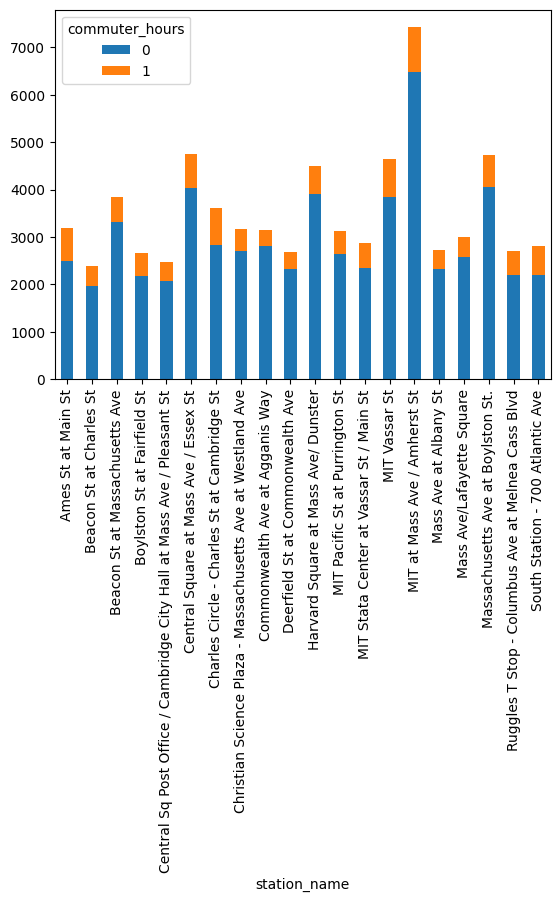

In [ ]:
by_station = rides.groupby(["start_station_id","commuter_hours"])["ride_id"].count().reset_index()
by_station["station_id"] = by_station["start_station_id"]
stations["station_id"] = stations["id"]
by_station = pd.merge(by_station,stations,on="station_id")
by_station_and_commute = by_station[["station_name","ride_id","commuter_hours"]]

total_rides_per_station = by_station.groupby("station_name")["ride_id"].sum()
top_20 = total_rides_per_station.nlargest(20).index
by_station_top20 = by_station[by_station["station_name"].isin(top_20)]
by_station_top20 = by_station_top20[["commuter_hours","station_name","ride_id"]]
by_station_top20 = by_station_top20.pivot(
    index="station_name", 
    columns="commuter_hours", 
    values="ride_id" 
)
by_station_top20.plot.bar(stacked=True)


,start_station_id,commuter_hours,station_name,ride_id
28,A32019,0,175 N Harvard St,901
29,A32019,1,175 N Harvard St,147
31,A32021,0,West End Park,52
33,A32021,1,West End Park,50
353,C32070,0,300 Summer St,346
354,C32070,1,300 Summer St,123
385,C32091,0,645 Summer St,138
386,C32091,1,645 Summer St,63
391,C32094,0,2 Hummingbird Lane at Olmsted Green,6
392,C32094,1,2 Hummingbird Lane at Olmsted Green,1
